In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sn

In [2]:
(X_train, y_train), (X_test,y_test) = keras.datasets.mnist.load_data()

11501568/11490434 [==============================] - 1s 0us/step


In [3]:
# Check the lenght of the entire training images dataset
len(X_train)

60000

In [4]:
# Check the lenght of the entire test images dataset
len(X_test)

10000

In [5]:
# Look at the shape of first image
X_train[0].shape

(28, 28)

In [ ]:
X_train[0]

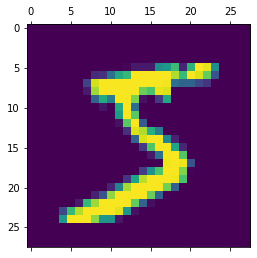

In [7]:
plt.matshow(X_train[0])

In [8]:
y_train[2]

4

In [9]:
# y_train conains the labels for each image from 0 to 9
y_train[:5]

array([5, 0, 4, 1, 9], dtype=uint8)

In [10]:
X_train.shape

(60000, 28, 28)

In [13]:
# We want to flatten our training dataset
# To do that we multiply width by lenght for each image
# in the training set
X_train_flattened = X_train.reshape(len(X_train),28*28)
X_train_flattened.shape

(60000, 784)

In [ ]:
X_train_flattened[0]

## Build a model

In [15]:
model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,), activation='sigmoid')
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.fit(X_train_flattened, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 2s 1ms/step - loss: 9.8518 - accuracy: 0.8384
Epoch 2/5
1875/1875 [==============================] - 2s 1ms/step - loss: 6.0772 - accuracy: 0.8791
Epoch 3/5
1875/1875 [==============================] - 2s 1ms/step - loss: 5.6486 - accuracy: 0.8820
Epoch 4/5
1875/1875 [==============================] - 2s 1ms/step - loss: 5.4436 - accuracy: 0.8859
Epoch 5/5
1875/1875 [==============================] - 2s 1ms/step - loss: 5.4180 - accuracy: 0.8851


### Scaling features

In [16]:
X_train = X_train / 255
X_test = X_test / 255

In [19]:
X_train_flattened = X_train.reshape(len(X_train),28*28)
X_test_flattened = X_test.reshape(len(X_test),28*28)

In [18]:
model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,), activation='sigmoid')
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.fit(X_train_flattened, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.4667 - accuracy: 0.8785
Epoch 2/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3041 - accuracy: 0.9158
Epoch 3/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2835 - accuracy: 0.9208: 0s - loss: 0.2900  - ETA: 0s - loss: 0
Epoch 4/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2731 - accuracy: 0.9243
Epoch 5/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2664 - accuracy: 0.9254


In [20]:
model.evaluate(X_test_flattened, y_test)

313/313 [==============================] - 0s 822us/step - loss: 0.2671 - accuracy: 0.9253


[0.26705121994018555, 0.9253000020980835]

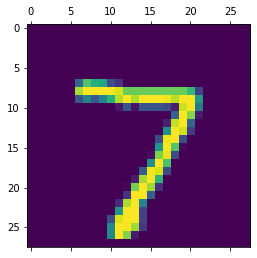

In [22]:
plt.matshow(X_test[0])

In [24]:
# Predict for all the values
y_predicted = model.predict(X_test_flattened)
# Look at the prediction of first image
y_predicted[0]

array([1.9924104e-02, 4.9588778e-07, 6.5554142e-02, 9.6622515e-01,
       3.0743182e-03, 1.1211014e-01, 1.4802441e-06, 9.9985003e-01,
       7.7439874e-02, 7.1527481e-01], dtype=float32)

In [25]:
np.argmax(y_predicted[0])

7

### Confusion matrix

In [27]:
y_pred_labels = [np.argmax(i) for i in y_predicted]
y_pred_labels[:5]

[7, 2, 1, 0, 4]

In [28]:
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_pred_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 963,    0,    1,    2,    0,    5,    5,    3,    1,    0],
       [   0, 1117,    3,    2,    0,    1,    4,    2,    6,    0],
       [   5,    8,  931,   15,   11,    4,   12,   12,   31,    3],
       [   4,    0,   25,  911,    1,   31,    1,   12,   17,    8],
       [   1,    2,    6,    0,  929,    0,    6,    3,    5,   30],
       [   9,    3,    4,   27,   14,  786,   14,    7,   22,    6],
       [  11,    3,    6,    1,    9,   16,  909,    2,    1,    0],
       [   1,    5,   24,    3,   10,    0,    0,  951,    2,   32],
       [   8,   10,    8,   23,   10,   35,    9,   13,  845,   13],
       [  10,    7,    2,   10,   33,    9,    0,   24,    3,  911]])>

Text(69.0, 0.5, 'Truth')

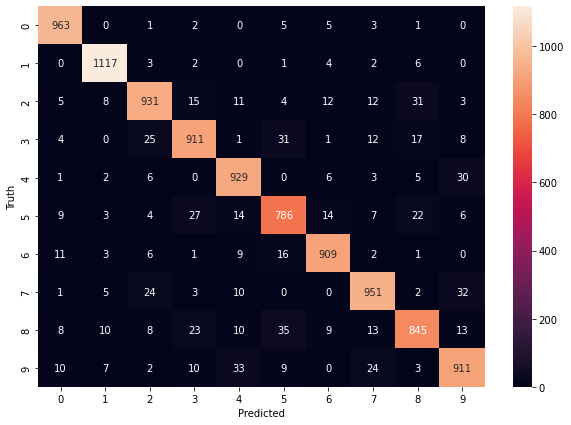

In [30]:
plt.figure(figsize= (10,7))
sn.heatmap(cm,annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

### Add a hidden layer

In [31]:
model = keras.Sequential([
    # specifiy nr of neurons in hidden layer (note: is less than input shape)
    keras.layers.Dense(100, input_shape=(784,), activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.fit(X_train_flattened, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2701 - accuracy: 0.9229
Epoch 2/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.1216 - accuracy: 0.9640
Epoch 3/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0841 - accuracy: 0.9750: 1s
Epoch 4/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0642 - accuracy: 0.9806
Epoch 5/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0487 - accuracy: 0.9851


In [32]:
model.evaluate(X_test_flattened, y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.0864 - accuracy: 0.9736


[0.08641164004802704, 0.9735999703407288]

Text(69.0, 0.5, 'Truth')

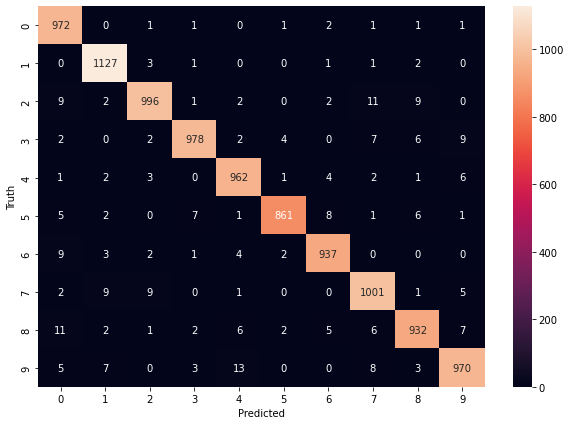

In [33]:
y_predicted = model.predict(X_test_flattened)
y_pred_labels = [np.argmax(i) for i in y_predicted]

cm = tf.math.confusion_matrix(labels=y_test,predictions=y_pred_labels)
plt.figure(figsize= (10,7))
sn.heatmap(cm,annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')


### Note: you can use built-in function of keras for flatten the images

In [35]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)
# Note: now X_train is NOT flattened, but it will be flattened
# inside the model when passed
model.fit(X_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2634 - accuracy: 0.9254
Epoch 2/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1170 - accuracy: 0.9658
Epoch 3/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0815 - accuracy: 0.9760
Epoch 4/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0626 - accuracy: 0.9807
Epoch 5/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0497 - accuracy: 0.9847
